In [115]:
import math
import yfinance as yf
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
pd.options.mode.chained_assignment = None

#pip install tensorflow - RODAR COMO ADM NO PROMPT DO WINDOWS

In [116]:
acao = 'BTC-USD'

inicio = "2011-05-10"
final = "2023-04-26"

dados_acao = yf.download(acao, inicio, final)

dados_acao

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-04-21,28249.230469,28349.968750,27177.365234,27276.910156,27276.910156,20759504330
2023-04-22,27265.894531,27872.142578,27169.570312,27817.500000,27817.500000,13125734602
2023-04-23,27816.144531,27820.244141,27400.314453,27591.384766,27591.384766,12785446832


In [117]:
# Não pode ser ajustados

cotacao = dados_acao['Close'].to_numpy().reshape(-1, 1)

cotacao

array([[  457.33401489],
       [  424.44000244],
       [  394.79598999],
       ...,
       [27591.38476562],
       [27525.33984375],
       [28307.59765625]])

In [118]:
tamanho_dados_treinamento = int(len(cotacao) * 0.8)

tamanho_dados_treinamento

2514

1590 dias

In [119]:
# Escalar os dados, porque escalar importa muito para Machine Learning.

# Escalar os dados entre 0 e 1, para deixar mais fácil o processamento

# Dados em escalas pré definidas são mais fáceis de lidar

In [120]:
escalador = MinMaxScaler(feature_range=(0, 1))

dados_entre_0_e_1_treinamento = escalador.fit_transform(cotacao[0: tamanho_dados_treinamento, :])

dados_entre_0_e_1_teste = escalador.transform(cotacao[tamanho_dados_treinamento: , :])

dados_entre_0_e_1 = list(dados_entre_0_e_1_treinamento.reshape(
    len(dados_entre_0_e_1_treinamento))) + list(dados_entre_0_e_1_teste.reshape(len(dados_entre_0_e_1_teste)))

dados_entre_0_e_1 = np.array(dados_entre_0_e_1).reshape(len(dados_entre_0_e_1), 1)

dados_entre_0_e_1



array([[0.00440947],
       [0.00389002],
       [0.0034219 ],
       ...,
       [0.43289583],
       [0.43185289],
       [0.44420588]])

In [121]:
dados_para_treinamento = dados_entre_0_e_1[0: tamanho_dados_treinamento, :]

# Dados que serão usados para gerar o resultado
treinamento_x = []

# Cotação que aconteceu de fato
treinamento_y = []

# 60 deve se ao foto de 60 dias para prever o valor da ação, nesse caso de 60 a 1590 dias
for i in range(60, len(dados_para_treinamento)):

    # 60 últimos dias
    treinamento_x.append(dados_para_treinamento[i - 60: i, 0])

    # Cotação
    treinamento_y.append(dados_para_treinamento[i, 0])

    if i <= 61:
        print(treinamento_x)
        print(treinamento_y)


[array([0.00440947, 0.00389002, 0.0034219 , 0.00364469, 0.00348546,
       0.00353806, 0.00406927, 0.00387052, 0.00368685, 0.00357396,
       0.0034965 , 0.00314373, 0.00311667, 0.00329791, 0.00324534,
       0.00311043, 0.00286471, 0.00238077, 0.00224882, 0.00239992,
       0.00249638, 0.00276093, 0.00295179, 0.00289709, 0.00290872,
       0.00316534, 0.0033527 , 0.00351782, 0.00342154, 0.00322861,
       0.00324759, 0.00336893, 0.00333899, 0.00323318, 0.0032905 ,
       0.00323812, 0.00284742, 0.00284628, 0.00267141, 0.00278879,
       0.00276171, 0.0028348 , 0.00248697, 0.00264036, 0.00253008,
       0.00233155, 0.0023338 , 0.00236005, 0.00240645, 0.00254847,
       0.00270329, 0.00259473, 0.00264325, 0.00292396, 0.00298176,
       0.00299394, 0.00387614, 0.00383151, 0.00346962, 0.00312718])]
[0.0033127172346353144]
[array([0.00440947, 0.00389002, 0.0034219 , 0.00364469, 0.00348546,
       0.00353806, 0.00406927, 0.00387052, 0.00368685, 0.00357396,
       0.0034965 , 0.00314373, 0.0

In [122]:
# Transformado as listas em arrays e dando reshape 3D
treinamento_x, treinamento_y = np.array(treinamento_x), np.array(treinamento_y)

print(treinamento_x) # Duas dimensões

treinamento_x = treinamento_x.reshape(treinamento_x.shape[0], treinamento_x.shape[1], 1)

print(treinamento_x) # Três dimensões

[[0.00440947 0.00389002 0.0034219  ... 0.00383151 0.00346962 0.00312718]
 [0.00389002 0.0034219  0.00364469 ... 0.00346962 0.00312718 0.00331272]
 [0.0034219  0.00364469 0.00348546 ... 0.00312718 0.00331272 0.00330523]
 ...
 [0.61635127 0.57980415 0.55860492 ... 0.66414858 0.65452603 0.62844957]
 [0.57980415 0.55860492 0.56350693 ... 0.65452603 0.62844957 0.61624357]
 [0.55860492 0.56350693 0.52716016 ... 0.62844957 0.61624357 0.59967888]]
[[[0.00440947]
  [0.00389002]
  [0.0034219 ]
  ...
  [0.00383151]
  [0.00346962]
  [0.00312718]]

 [[0.00389002]
  [0.0034219 ]
  [0.00364469]
  ...
  [0.00346962]
  [0.00312718]
  [0.00331272]]

 [[0.0034219 ]
  [0.00364469]
  [0.00348546]
  ...
  [0.00312718]
  [0.00331272]
  [0.00330523]]

 ...

 [[0.61635127]
  [0.57980415]
  [0.55860492]
  ...
  [0.66414858]
  [0.65452603]
  [0.62844957]]

 [[0.57980415]
  [0.55860492]
  [0.56350693]
  ...
  [0.65452603]
  [0.62844957]
  [0.61624357]]

 [[0.55860492]
  [0.56350693]
  [0.52716016]
  ...
  [0.6284

CONSTRUÍNDO O MODELO

In [123]:
modelo = Sequential()

# Vamos criar um modelo com 50 neurônios
# return sequences = True, pois vamos usar outro LSTM depois.
# Definir o shape, que no caso são de 60 informações para gerar uma 
# Adicionar mais neurônios com o dense, 25 e 1
# Não se apegue a isso agora, é apenas uma arquitetura de deep learning

In [124]:
modelo.add(LSTM(50, return_sequences=True, input_shape = (treinamento_x.shape[1], 1)))
modelo.add(LSTM(50, return_sequences=False))
modelo.add(Dense(25))
modelo.add(Dense(1))

treinamento_x.shape[1]

60

In [125]:
# Conpilando o modelo

# A função de loss é a forma de medir o erro do modelo, que nesse caso, é o clássico erro médio quadrátrico
# do que é usado em regressão linear 
# Otimizador e medida de erro

modelo.compile(optimizer="adam", loss="mean_squared_error")

In [126]:
# Agora com o modelo compilado e os dados, podemos treinar o modelo batch size e depois de quantas em quantas amostras,
# o modelo irá otimizar os parâmetros.
# epochs são quantas vezes o algorítmo irá rodar os dados de treinamento, aprendendo

modelo.fit(treinamento_x, treinamento_y, batch_size=1, epochs=1)

2454/2454 [==============================] - 65s 25ms/step - loss: 0.0016


In [127]:
# Criar dados dos testes 

dados_teste = dados_entre_0_e_1[tamanho_dados_treinamento - 60: :]

teste_x = []
teste_y = cotacao[tamanho_dados_treinamento:, :]

for i in range(60, len(dados_teste)):
    teste_x.append(dados_teste[i - 60: i, 0])

In [128]:
# Reshape
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

In [129]:
# Pegando predições do modelo
predicoes = modelo.predict(teste_x)

# Tirando a escala dos dados
predicoes = escalador.inverse_transform(predicoes)

predicoes

20/20 [==============================] - 3s 20ms/step


array([[43616.234],
       [43707.137],
       [44160.21 ],
       [44968.434],
       [45727.47 ],
       [46734.28 ],
       [47601.105],
       [48293.195],
       [48644.258],
       [49270.633],
       [49825.273],
       [50272.098],
       [50461.62 ],
       [50325.94 ],
       [50077.414],
       [50078.98 ],
       [50560.95 ],
       [51133.31 ],
       [51737.9  ],
       [52306.92 ],
       [52521.176],
       [52728.543],
       [52609.664],
       [52665.855],
       [52760.754],
       [52854.688],
       [52686.516],
       [52445.09 ],
       [52437.195],
       [52598.96 ],
       [52917.645],
       [53253.473],
       [53809.957],
       [54508.402],
       [54350.992],
       [53749.562],
       [53059.9  ],
       [52203.68 ],
       [51437.438],
       [50935.125],
       [50466.16 ],
       [50385.35 ],
       [50640.83 ],
       [50962.273],
       [51202.53 ],
       [51517.258],
       [51672.715],
       [51113.35 ],
       [50012.027],
       [49211.848],


In [130]:
# Pegando o erro médio quadrático
rmse = np.sqrt(np.mean(predicoes - teste_y) ** 2)

rmse

3271.8802476649444

In [131]:
# Criando o gráfico do modelo
treinamento = dados_acao.iloc[:tamanho_dados_treinamento, :]

df_teste = pd.DataFrame({"Close": dados_acao["Close"].iloc[tamanho_dados_treinamento],
                         "predicoes": predicoes.reshape(len(predicoes))})

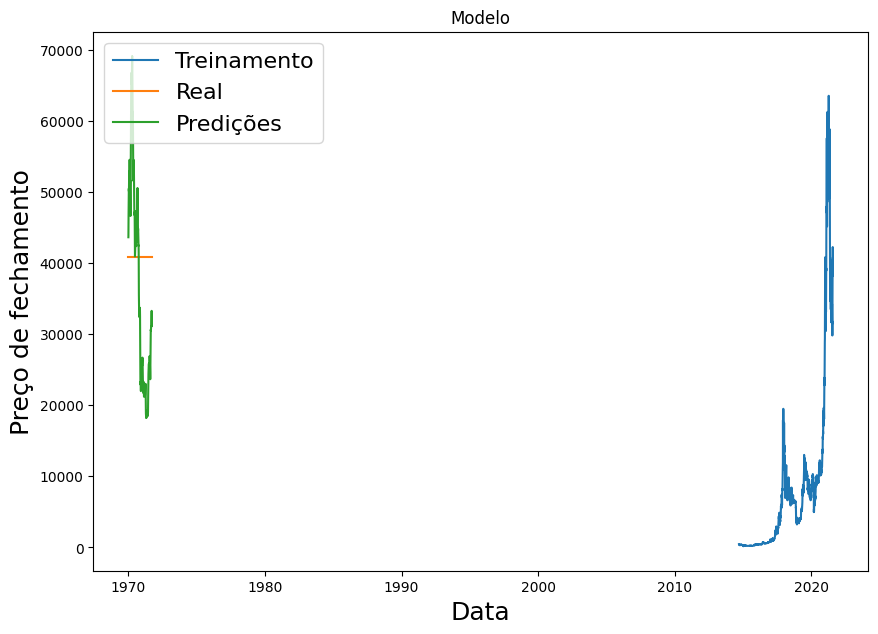

In [132]:
plt.figure(figsize=(10, 7))
plt.title('Modelo')
plt.xlabel('Data', fontsize = 18)
plt.ylabel("Preço de fechamento", fontsize = 18)
plt.plot(treinamento["Close"])
plt.plot(df_teste[['Close', 'predicoes']])
plt.legend(['Treinamento', 'Real', 'Predições'], loc=2, prop={'size': 16})
plt.show()

# Queda pegou o modelo desprevinido.    

In [133]:
df_teste.sort_index()

df_teste

,Close,predicoes
0,40869.554688,43616.234375
1,40869.554688,43707.136719
2,40869.554688,44160.210938
3,40869.554688,44968.433594
4,40869.554688,45727.468750
...,...,...
624,40869.554688,32791.308594
625,40869.554688,32308.039062
626,40869.554688,31883.347656
627,40869.554688,31508.169922


In [134]:
#o preço é legal, mas o importante é acertar pra qual mercado o lado vai. Sera q isso foi feito?

#calcular media de acertos e expectativa de lucro

df_teste['variacao_percentual_acao'] = df_teste['Close'].pct_change()
df_teste['variacao_percentual_modelo'] = df_teste['predicoes'].pct_change()

df_teste = df_teste.dropna()

df_teste['var_acao_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_acao'] > 0, 
                                                      True, False)
df_teste['var_modelo_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_modelo'] > 0, 
                                                      True, False)

df_teste['acertou_o_lado'] = np.where(df_teste['var_acao_maior_menor_que_zero'] == df_teste['var_modelo_maior_menor_que_zero']
                                      , True, False)

df_teste['variacao_percentual_acao_abs'] = df_teste['variacao_percentual_acao'].abs()

df_teste


,Close,predicoes,variacao_percentual_acao,variacao_percentual_modelo,var_acao_maior_menor_que_zero,var_modelo_maior_menor_que_zero,acertou_o_lado,variacao_percentual_acao_abs
1,40869.554688,43707.136719,0.0,0.002084,False,True,False,0.0
2,40869.554688,44160.210938,0.0,0.010366,False,True,False,0.0
3,40869.554688,44968.433594,0.0,0.018302,False,True,False,0.0
4,40869.554688,45727.468750,0.0,0.016879,False,True,False,0.0
5,40869.554688,46734.281250,0.0,0.022018,False,True,False,0.0
...,...,...,...,...,...,...,...,...
624,40869.554688,32791.308594,0.0,-0.009522,False,False,True,0.0
625,40869.554688,32308.039062,0.0,-0.014738,False,False,True,0.0
626,40869.554688,31883.347656,0.0,-0.013145,False,False,True,0.0
627,40869.554688,31508.169922,0.0,-0.011767,False,False,True,0.0


In [135]:
acertou_lado = df_teste['acertou_o_lado'].sum()/len(df_teste['acertou_o_lado'])
errou_lado = 1 - acertou_lado

media_lucro = df_teste.groupby('acertou_o_lado')['variacao_percentual_acao_abs'].mean()

exp_mat_lucro = acertou_lado * media_lucro[1] - media_lucro[0] * errou_lado

ganho_sobre_perda = media_lucro[1]/media_lucro[0]

print(media_lucro)
print(ganho_sobre_perda)
print(acertou_lado)
print(exp_mat_lucro * 100)

acertou_o_lado
False    0.0
True     0.0
Name: variacao_percentual_acao_abs, dtype: float64
nan
0.5254777070063694
0.0


C:\Users\Mari\AppData\Local\Temp\ipykernel_7328\1543314228.py:8: RuntimeWarning: invalid value encountered in double_scalars
  ganho_sobre_perda = media_lucro[1]/media_lucro[0]


In [136]:
#criando um código que você passa 60 dias e ele devolve a cotação
#resumindo: vamos descobrir o preço da petrobras de hoje/amanha com esse modelo

data_hoje = datetime.now()

#se quiser escolher um dia, basta fazer assim

data_hoje = datetime.now() - timedelta(days = 1)

if data_hoje.hour > 18:
    
    final = data_hoje
    inicial = datetime.now() - timedelta(days = 252)
    
else:
    final = data_hoje - timedelta(days = 1)
    inicial = datetime.now() - timedelta(days = 252)
    
#nao vai botar outra ação aqui hein kkkkkkkk
cotacoes = yf.download(acao, inicio, final)
ultimos_60_dias = cotacoes['Close'].iloc[-60:].values.reshape(-1, 1)

ultimos_60_dias_escalado = escalador.transform(ultimos_60_dias)

teste_x = []
teste_x.append(ultimos_60_dias_escalado)
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

previsao_de_preco = modelo.predict(teste_x)
previsao_de_preco = escalador.inverse_transform(previsao_de_preco)

print(previsao_de_preco)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 72ms/step
[[31197.63]]
